# Аналитика в авиакомпании

Заказчик: компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.

Необходимо:
* изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали
* построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов. Сделать выводы.

# Оглавление

1. [Шаг 1. Изучение общей информации](#step1)   
2. [Шаг 2. Анализ данных](#step2)   
3. [Шаг 3. Общий вывод](#step3) 

# Шаг 1. Изучение общей информации  <a id="step1"></a>

In [1]:
# импорт библиотеки Pandas
import pandas as pd
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# импорт библиотеки seaborn
import seaborn as sns

Прочитаем файлы и посмотрим на данные в них

In [2]:
# чтение файла query_1.csv с данными
model_and_flights_amount = pd.read_csv('/datasets/query_1.csv',sep = ',')
# чтение файла query_2.csv с данными
city_and_average_flights = pd.read_csv('/datasets/query_3.csv',sep = ',')
# вывод таблицы с данными model_and_flights_amount
print("Таблица моделей самолета и количества рейсов \
            для каждой модели в сентябре 2018 года\n", model_and_flights_amount)
# вывод таблицы с данными city_and_average_flights
print("\nТаблица городов и среднем количестве рейсов, \
            прибывающих в город за день в августе 2018 года\n", city_and_average_flights.sample(10))

Таблица моделей самолета и количества рейсов             для каждой модели в сентябре 2018 года
                  model  flights_amount
0      Airbus A319-100             607
1      Airbus A321-200             960
2       Boeing 737-300             630
3       Boeing 767-300             600
4       Boeing 777-300             300
5   Bombardier CRJ-200            4446
6   Cessna 208 Caravan            4557
7  Sukhoi SuperJet-100            4185

Таблица городов и среднем количестве рейсов,             прибывающих в город за день в августе 2018 года
            city  average_flights
95    Череповец         2.161290
6      Белгород         6.000000
13  Владикавказ         2.000000
61         Орск         1.590909
63        Пермь        10.129032
9        Братск         1.000000
10       Брянск        10.000000
82      Удачный         3.000000
45        Надым         2.290323
30      Когалым         3.161290


In [3]:
# вывод информации по столбцам
print(model_and_flights_amount.describe())
print("\n")
print(city_and_average_flights.describe())

       flights_amount
count        8.000000
mean      2035.625000
std       1965.203947
min        300.000000
25%        605.250000
50%        795.000000
75%       4250.250000
max       4557.000000


       average_flights
count       101.000000
mean          5.494189
std          13.119790
min           1.000000
25%           2.000000
50%           3.000000
75%           5.870968
max         129.774194


In [4]:
# информация о типе столбцов и пропущенных значениях
print("Таблица моделей самолета и количества рейсов для каждой модели в сентябре 2018 года\n")
print(model_and_flights_amount.info())

print("\n")
print("\nТаблица городов и среднем количестве рейсов, прибывающих в город за день в августе 2018 года\n")
print(city_and_average_flights.info())

Таблица моделей самолета и количества рейсов для каждой модели в сентябре 2018 года

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None



Таблица городов и среднем количестве рейсов, прибывающих в город за день в августе 2018 года

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


Рассмотрим полученную информацию подробнее.

Таблица model_and_flights_amount содержит два столбца:
* model — модели самолета. Всего 8 моделей самолета. Тип object - строковый тип, тип подходит нам. Дублирующихся моделей нет, данные корректны.
* flights_amount — количество рейсов для каждой модели самолетов model. Минимальное количество перелетов в сентябре 2018г. было 300 на Boeing 777-300. Максимальное количество 4557 на Cessna 208 Caravan. Тип столбца int64 - целочисленный тип, тип подходит. Можем конвертировать столбец в тип int16.

Таблица city_and_average_flights состоит из 101 строки и содержит два столбца:
* city — города. Тип столбца object - строковый тип, тип подходит.
* average_flights — среднее количество рейсов, прибывающих в город city за день. Минимальное среднее количество рейсов 5, максимальное среднее количество рейсов 129. Тип столбца float64 - вещественные числа двойной точности, тип подходит. Точность до 6-ти знаков нам ни к чему, также для удобства чтения графиков приведем дробные значения до двух знаков после запятой.

Пропусков в таблицах нет.

In [5]:
city_and_average_flights.average_flights = city_and_average_flights.average_flights.round(2)
city_and_average_flights.sample(5)

,city,average_flights
74,Сочи,9.61
77,Сургут,8.74
99,Якутск,2.74
18,Горно-Алтайск,1.39
12,Владивосток,3.00


In [6]:
# приведение к нижнему регистру и к типу category
model_and_flights_amount.flights_amount = model_and_flights_amount.flights_amount.astype('int16')
print('Привели столбец flights_amount к типу',model_and_flights_amount.flights_amount.dtypes) 

Привели столбец flights_amount к типу int16


In [7]:
print('Из {} города, уникальных городов в датафрейме city_and_average_flights {}'.\
      format(city_and_average_flights.shape[0],len(city_and_average_flights.city.unique())))

Из 101 города, уникальных городов в датафрейме city_and_average_flights 101


Дублирующихся данных в таблице city_and_average_flights нет.

In [8]:
# уникальные значения столбца
city_and_average_flights.city.unique()

array(['Абакан', 'Анадырь', 'Анапа', 'Архангельск', 'Астрахань',
       'Барнаул', 'Белгород', 'Белоярский', 'Благовещенск', 'Братск',
       'Брянск', 'Бугульма', 'Владивосток', 'Владикавказ', 'Волгоград',
       'Воркута', 'Воронеж', 'Геленджик', 'Горно-Алтайск', 'Грозный',
       'Екатеринбург', 'Иваново', 'Ижевск', 'Иркутск', 'Йошкар-Ола',
       'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров', 'Когалым',
       'Комсомольск-на-Амуре', 'Краснодар', 'Красноярск', 'Курган',
       'Курск', 'Кызыл', 'Липецк', 'Магадан', 'Магнитогорск', 'Махачкала',
       'Минеральные Воды', 'Мирный', 'Москва', 'Мурманск', 'Надым',
       'Нальчик', 'Нарьян-Мар', 'Нерюнгри', 'Нефтеюганск',
       'Нижневартовск', 'Нижнекамск', 'Нижний Новгород', 'Новокузнецк',
       'Новосибирск', 'Новый Уренгой', 'Норильск', 'Ноябрьск', 'Нягань',
       'Омск', 'Оренбург', 'Орск', 'Пенза', 'Пермь', 'Петрозаводск',
       'Петропавловск-Камчатский', 'Псков', 'Ростов-на-Дону', 'Салехард',
       'Самара', 'Санк

Все города имеют корректные названия, написаны с большой буквы и отсортированы по алфавиту, также можно отметить, что все города из РФ.

### Вывод
* в исходных данных представлено две таблицы, одна содержит информацию о моделях самолета и количестве рейсов для каждой модели в сентябре 2018 года. Другая содержит информацию о городах и среднем количестве рейсов, прибывающих в город за день в августе 2018 года.
* в таблице с моделями самолетов представлено всего 8 записей
* в таблице с городами представлена 101 запись
* изучили типы данных столбцов, типы нам подходят
* обнаружили, что пропусков  в таблицах нет
* обнаружили, что данные в таблицах корректные, отсутствуют дубликаты и пригодны для дальнейшего анализа.

# Шаг 2. Анализ данных  <a id="step2"></a>

Построим график: модели самолетов и количества рейсов

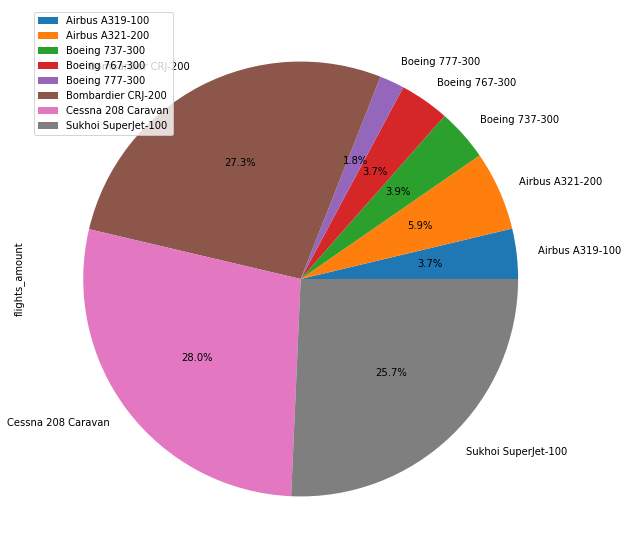

In [9]:
# список названий городов для круговой диаграммы
labels = model_and_flights_amount.model.tolist()
# круговая диаграмма городов и среднем количестве рейсов
model_and_flights_amount.plot.pie(y='flights_amount', figsize=(10,10), labels=labels, autopct='%1.1f%%')

Углубимся в предметную область:

Cessna 208 Caravan - небольшие самолеты до 14 мест.

Bombardier CRJ-200 - самолет на 50 мест. 

Sukhoi SuperJet-100 - рассчитан на 95-98 мест. 

Airbus A321-200 - рассчитан на 220 - 236 мест.

Boeing 737-300 - рассчитан на 149 мест. 

Airbus A319-100 - рассчитан на 156 пассажиров.

Boeing 767-300 - вместимость - 328 мест. 

Boeing 777-300 - вместимость - 550 пассажиров. 

На самых маленьких самолетах в авиапарке компании F9 совершалось больше всего перелетов в сентябре 2018 года, это такие модели как Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi Superjet 100. 

Следом за ними по количеству перелетов идут самолеты побольше, это Airbus A321-200, Boeing 737-300, Airbus A319-100, Boeing 767-300. И самое маленькое количество перелетов совершается на Boeing 777-300, это самый крупный самолет по габаритам и количеству мест, которые совершал полеты в августе 2018г.

Построим график: городов и количеству рейсов.

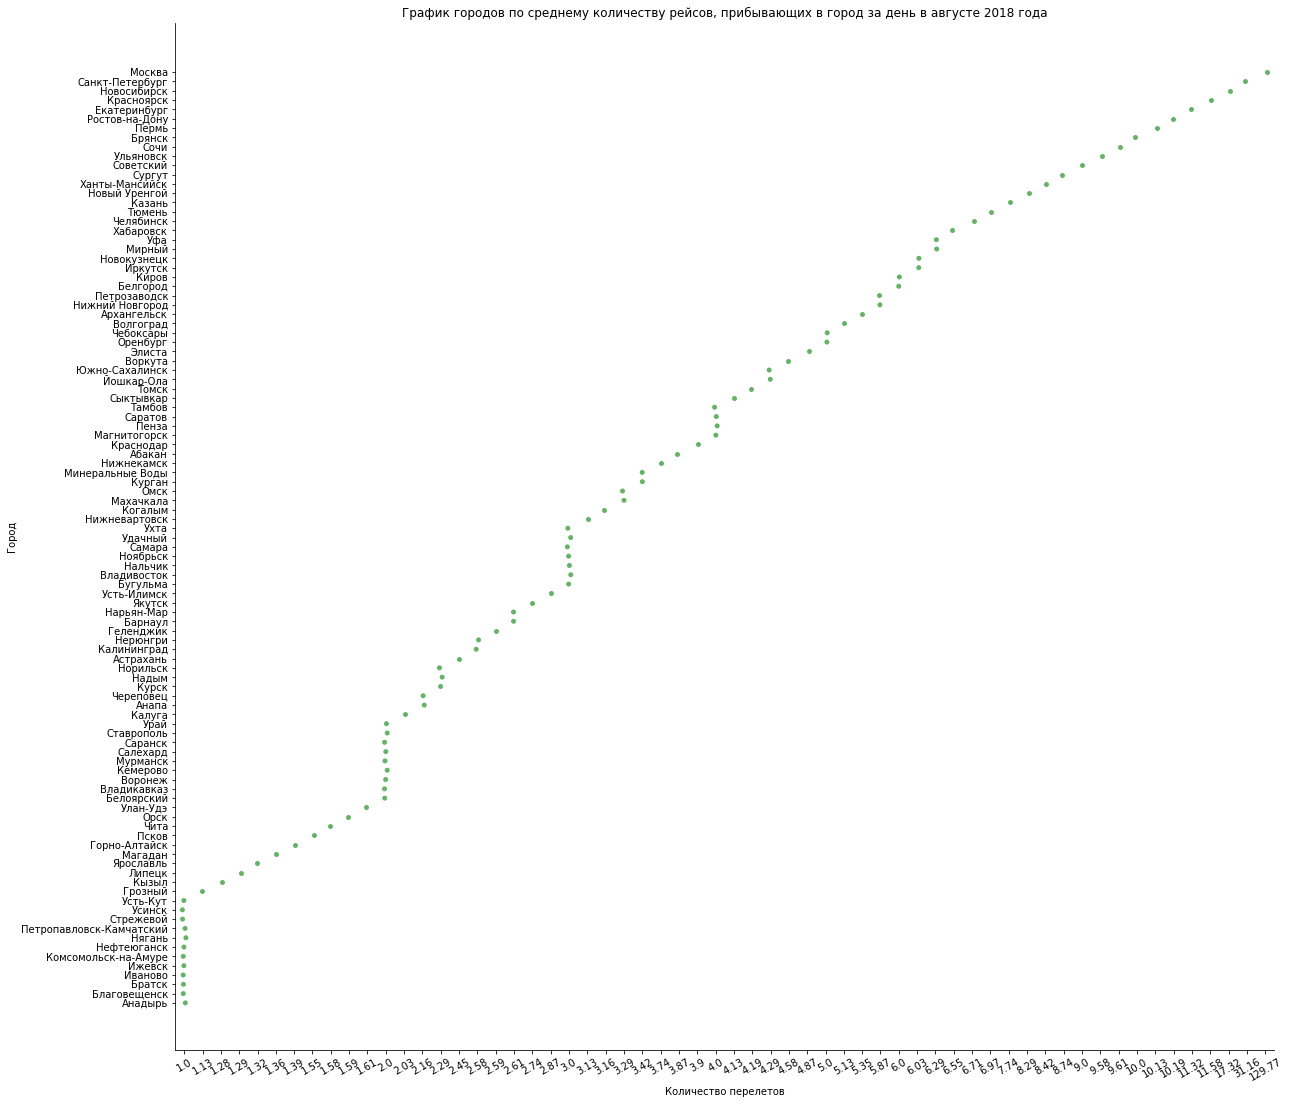

In [10]:
# график городов и среднем количестве рейсов, прибывающих в город за день в августе 2018 года
sns.catplot(\
            kind="strip", data=city_and_average_flights,  y='city', x='average_flights', \
            alpha=.6, color='#008000', height=15, aspect=1.2, orient='v'\
           )
# установим заголовок для графика
plt.title("График городов по среднему количеству рейсов, прибывающих в город за день в августе 2018 года"); 
# подпишем оси координат обозначив единицы измерения
plt.ylabel('Город')
plt.xlabel('Количество перелетов')
plt.xticks(rotation=30)
plt.show()

Около одного прилета в сентябре 2018 года было совершено в такие города как Усинск, Стрежевой, Петропавловск-Камчатский, Нягань, Невтеюганск, Комсомольск-на-Амуре, Ижевск, Иваново, Братск, Благовещенск, Анадырь. Такой результат неудивителен, так как эти города небольшие, больше всего населения проживает в Ижевске 648213, тогда как в Анадыре всего 15819 (ист. Википедия).

Но не по всем городам такая логика прослеживается, так как есть такие города, например Мирный, где размер населения меньше, чем в городе Иркутск, а количество перелетов больше. Есть и другие факторы влияющие на количество перелетов в города компанией F9, но в данной задаче исследование этих факторов не требуется, поэтому пойдем дальше.

В среднем города России обслуживали от 1 до 5 самолета авиакомпании F9.

Видим сильный пик(129 перелетов) для Москвы, посмотрим топ-10 городов по количеству рейсов, в среднем в этот топ входят наиболее посещаемые города, от 10 до 129 перелетов. 

In [11]:
top_10_city = city_and_average_flights.sort_values(by='average_flights', ascending = False).head(10)
top_10_city

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


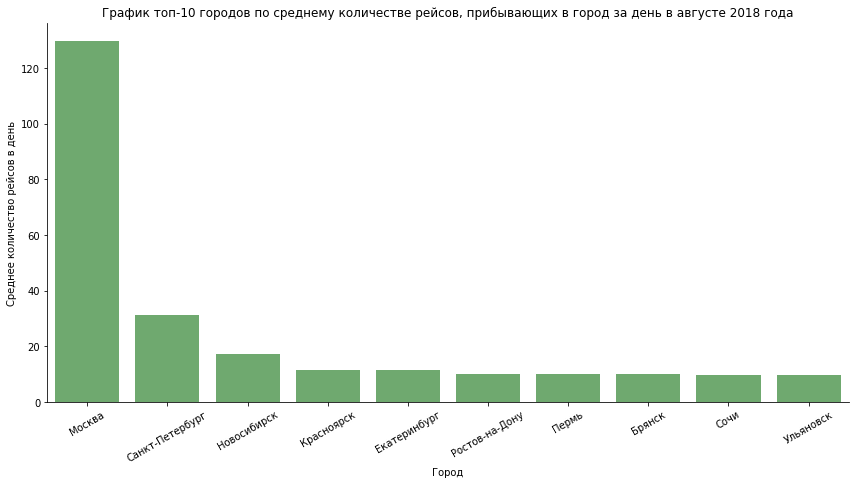

In [12]:
# график городов и среднем количестве рейсов, прибывающих в город за день в августе 2018 года
sns.catplot(\
            kind="bar", data=top_10_city,  x='city', y='average_flights', \
            alpha=.6, color='#008000', height=6, aspect=2, orient='v'\
           )
# установим заголовок для графика
plt.title("График топ-10 городов по среднему количестве рейсов, прибывающих в город за день в августе 2018 года"); 
# подпишем оси координат обозначив единицы измерения
plt.ylabel('Среднее количество рейсов в день')
plt.xlabel('Город')
plt.xticks(rotation=30)
plt.show()

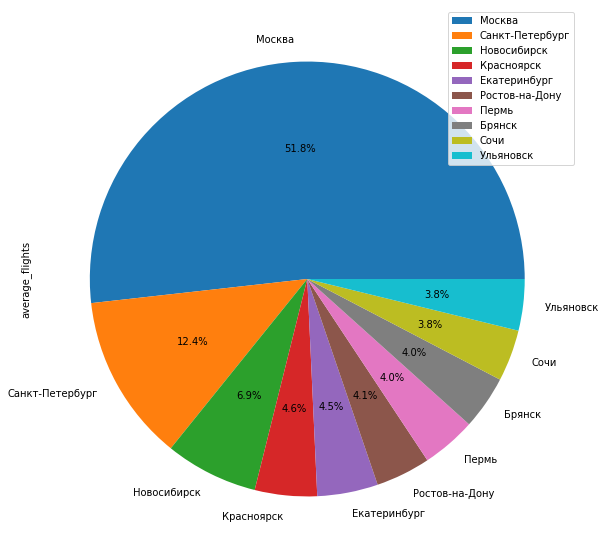

In [13]:
# список названий городов для круговой диаграммы
labels = top_10_city.city.tolist()
# круговая диаграмма городов и среднем количестве рейсов
top_10_city.plot.pie(y='average_flights', figsize=(10,10), labels=labels, autopct='%1.1f%%')

Лидер по среднему количеству рейсов - Москва, что не удивительно, как минимум потому что там три аэропорта, ну и помимо этого город основной траспортировочный узел страны с много миллионным населением.

Второе место у Санкт-Петербурга и третье место у Новосибирска. 

При этом Москва настолько сильно выделяется, в четыре раза среднее количество рейсов превышает среднее количество рейсов из Санкт-Петербурга, не говоря уже о других городах. По сравнению в Ульяновском количество рейсов из Москвы больше в 14 раз.

# Шаг 3. Общий вывод <a id="step3"></a>

В ходе проведенного анализа мы выяснили:

* На самых маленьких самолетах в авиапарке компании F9 совершалось больше всего перелетов в сентябре 2018 года, это такие модели как Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi Superjet 100.
* Второе место по количеству перелетов занимают такие модели как Airbus A321-200, Boeing 737-300, Airbus A319-100, Boeing 767-300.
* Меньше всего перелетов совершается на Boeing 777-300.
* Основная масса городов обслуживает в среднем от 1 до 5 рейсов авиакомпании F9.
* Всего около одного прилета в сентябре 2018 года было совершено в такие города как Усинск, Стрежевой, Петропавловск-Камчатский, Нягань, Невтеюганск, Комсомольск-на-Амуре, Ижевск, Иваново, Братск, Благовещенск, Анадырь. 
* По среднему числу ежедневных рейсов в 2018 году среди городов лидирует Москва (почти 130 рейсов в день), затем Санкт-Петербург (вчетверо меньше), Новосибирск(в 7.5 раз меньше), Красноярск(в 11 раз меньше), Екатеринбург(в 11 раз меньше). 